In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('df_for_eda.csv')

In [3]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19648 entries, 0 to 19647
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  19648 non-null  object 
 1   title                    19648 non-null  object 
 2   totalyearlycompensation  19648 non-null  int64  
 3   location                 19648 non-null  object 
 4   yearsofexperience        19648 non-null  float64
 5   yearsatcompany           19648 non-null  float64
 6   gender                   19648 non-null  object 
 7   education                19648 non-null  object 
 8   country                  19648 non-null  object 
 9   state                    19648 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.5+ MB


/var/folders/mh/t2vz9kkn6z99y7p0rnwcq33m0000gn/T/ipykernel_12824/3225035937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<AxesSubplot:>

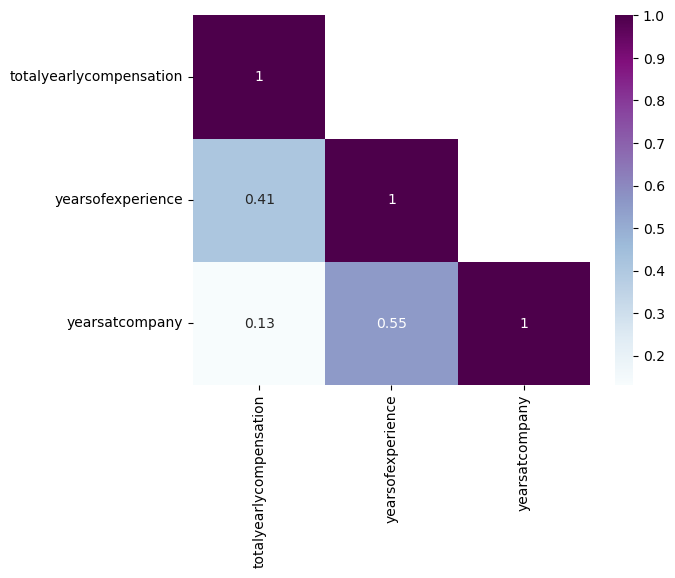

In [5]:
correlation_matrix = df.corr()
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices(len(correlation_matrix), k=1)]= True
sns.heatmap(correlation_matrix, cmap="BuPu", annot=True, mask=mask)

In [ ]:
#

In [6]:
#avg yearly compensation by gender
avg_per_gender = df.groupby(df['gender']).agg({'totalyearlycompensation': 'mean'}).rename(columns={'totalyearlycompensation': 'Avg Compensation'}).reset_index()
avg_per_gender

,gender,Avg Compensation
0,Female,197880.887185
1,Male,212718.929732


In [7]:
male_avg = avg_per_gender.loc[1, "Avg Compensation"]
female_avg =avg_per_gender.loc[0, "Avg Compensation"]

percent_difference = (male_avg - female_avg) / female_avg *100
percent_difference.round(2)

7.5

In [ ]:
sns_plot = sns.barplot(x="gender", y="Avg Compensation", data=avg_per_gender)

In [ ]:
avg_per_gender_title = df.groupby(['title', 'gender'])['totalyearlycompensation'].mean().rename('Avg Compensation').reset_index()
avg_per_gender_title

In [8]:
plt.figure(figsize=(25, 10))
sns.barplot(x = "title", y="Avg Compensation", hue = "gender", data = avg_per_gender_title )


NameError: name 'avg_per_gender_title' is not defined

<Figure size 2500x1000 with 0 Axes>

In [ ]:
#totalyearlycompensation scatter plot with years of experience, years at the company 

#is FAANG or not for company
#gender: dichotomous female = 0, male = 1 the coefficient can be interpreted as "male earn coeff dollars more than women"

#title: which one to drop when dummyfying?

#linearity between the dependant variable and each independant variable 
#no multicolinearity (check correlation between variables that are not the dependant variable)

#what to do with the unknown in education?